In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tips-dataset/tips_extended.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../input/tips-dataset/tips_extended.csv")
df.sample(10)

,Bill,Number_of_People,Arrived_in,Time_of_visit,Tips
42,135,5,car,evening,5
26,48,5,car,afternoon,9
17,41,2,bike,evening,0
13,19,1,bike,morning,0
38,90,6,car,NaN,5
35,67,4,bike,morning,3
21,0,0,bike,mor,0
0,16,1,bike,morning,0
7,22,2,bike,afternoon,0
1,23,2,bike,morning,0


In [4]:
df.Arrived_in.value_counts(dropna=False)

bike    24
car     22
NaN      4
Name: Arrived_in, dtype: int64

In [5]:
df.Time_of_visit.value_counts(dropna=False)

morning      17
evening      16
afternoon    14
NaN           2
mor           1
Name: Time_of_visit, dtype: int64

In [6]:
df['Arrived_in_cleaned'] = df.Arrived_in.fillna('bike')

In [7]:
df.Arrived_in_cleaned.value_counts(dropna=False)

bike    28
car     22
Name: Arrived_in_cleaned, dtype: int64

In [8]:
df = df[df['Time_of_visit'].notna()]

In [9]:
df.Time_of_visit.value_counts(dropna=False)

morning      17
evening      16
afternoon    14
mor           1
Name: Time_of_visit, dtype: int64

In [10]:
df['Time_of_visit_cleaned'] = df.Time_of_visit.replace('mor', 'morning')

In [11]:
df.Time_of_visit_cleaned.value_counts(dropna=False)

morning      18
evening      16
afternoon    14
Name: Time_of_visit_cleaned, dtype: int64

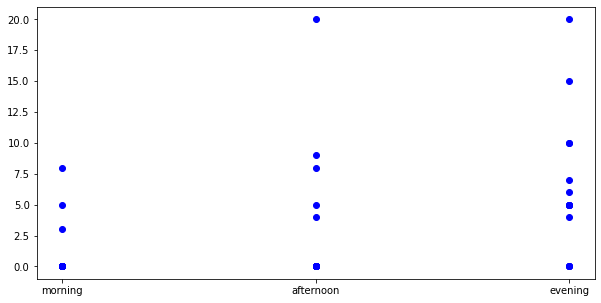

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df.Time_of_visit_cleaned,df.Tips,'o',color='Blue')

In [13]:
df = df.drop(['Arrived_in', 'Time_of_visit'], axis='columns')

In [14]:
df

,Bill,Number_of_People,Tips,Arrived_in_cleaned,Time_of_visit_cleaned
0,16,1,0,bike,morning
1,23,2,0,bike,morning
2,13,1,0,bike,afternoon
3,56,2,0,car,morning
4,27,1,0,bike,morning
5,52,1,8,car,afternoon
6,7,1,0,bike,afternoon
7,22,2,0,bike,afternoon
8,15,2,0,bike,afternoon
9,27,1,0,bike,morning


In [15]:
arrived_dict = {'bike': 0 ,'car': 1}
time_dict = {'morning': 0, 'afternoon': 1, 'evening': 2}
df['Arrived_in_cleaned'] = df['Arrived_in_cleaned'].map(lambda a: arrived_dict[a])
df['Time_of_visit_cleaned'] = df['Time_of_visit_cleaned'].map(lambda v: time_dict[v])

In [16]:
df

,Bill,Number_of_People,Tips,Arrived_in_cleaned,Time_of_visit_cleaned
0,16,1,0,0,0
1,23,2,0,0,0
2,13,1,0,0,1
3,56,2,0,1,0
4,27,1,0,0,0
5,52,1,8,1,1
6,7,1,0,0,1
7,22,2,0,0,1
8,15,2,0,0,1
9,27,1,0,0,0


In [17]:
df.to_csv('/kaggle/working/tips.extended_cleaned.csv',index=False)